In [1]:
from train import *
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import random
import scipy.ndimage
import scipy.misc

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
class TrainConfig(object):
    """Training configuration"""
    batch_size = 1
    lr = 0.01
    dropout = False
    dropout_keep_prob = 0.5
    model_name = 'conv_pool_net'
    model = staticmethod(globals()[model_name])
    config_name = 'baseline'

In [3]:
def predict(filename, config):
    """Load most recent checkpoint and make prediction"""
    with tf.Graph().as_default():
        file = tf.read_file(filename)
        
        img = tf.image.decode_jpeg(file, channels=3)
        img = tf.image.crop_to_bounding_box(img, 4, 4, 56, 56)
        img = tf.reshape(img, shape=(1, 56, 56, 3))
        img = tf.cast(img, tf.float32)
        img = (img - 128.0) / 128.0
        logits = config.model(img, config)      
        top_k = tf.nn.top_k(logits, k=5, sorted=True)
        saver = tf.train.Saver()
        with tf.Session() as sess:
            path = 'checkpoints/' + config.model_name + '/' + config.config_name
            saver.restore(sess, tf.train.latest_checkpoint(path))
            top_vals, top_idx = sess.run(top_k)
      
    return top_idx

In [4]:
label_dict, class_description = build_label_dicts()
for i in range(len(class_description)):
    class_description[i] = class_description[i].split(',')[0]

INFO:tensorflow:Restoring parameters from checkpoints/conv_pool_net/baseline/model-40000
INFO:tensorflow:Restoring parameters from checkpoints/conv_pool_net/baseline/model-40000
INFO:tensorflow:Restoring parameters from checkpoints/conv_pool_net/baseline/model-40000
INFO:tensorflow:Restoring parameters from checkpoints/conv_pool_net/baseline/model-40000
INFO:tensorflow:Restoring parameters from checkpoints/conv_pool_net/baseline/model-40000
INFO:tensorflow:Restoring parameters from checkpoints/conv_pool_net/baseline/model-40000
INFO:tensorflow:Restoring parameters from checkpoints/conv_pool_net/baseline/model-40000
INFO:tensorflow:Restoring parameters from checkpoints/conv_pool_net/baseline/model-40000
INFO:tensorflow:Restoring parameters from checkpoints/conv_pool_net/baseline/model-40000


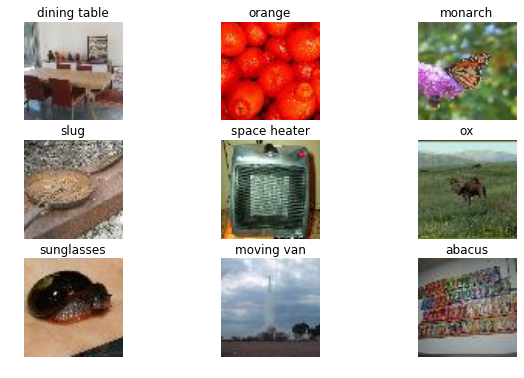

In [5]:
filenames = glob.glob('../tiny-imagenet-200/test/images/*.JPEG')
pick_9 = random.sample(filenames, 9)
config = TrainConfig()
for idx, filename in enumerate(pick_9):
    plt.subplot(3, 3, idx+1)
    img = scipy.ndimage.imread(filename)
    plt.imshow(img)
    plt.axis('off')
    pred_idx = predict(filename, config)
    plt.title(class_description[pred_idx[0][0]])
plt.show()